**Interactive notebook to make one time graph. Usefull to pull different dataset together and set custom filters to show relevant data.**

# Distributions (+/- treatment)

## Load data

In [11]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [12]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2" # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-09 - SeqFISH_Run10 - HeLa-Puro_POLR2"  # puro
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_sous_unite_polymerase/"
folder_name = "distributions_puro_no_puro"

In [13]:
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["untreated", "puro"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0)

In [14]:
Cell_data = Cell_data.loc[~Cell_data['target'].str.contains('Washout')]
Cell_data = RNA_filtering(Cell_data)
Cell_data

,quantification_id,index_mean_distance_cell,index_median_distance_cell,index_mean_distance_nuc,index_median_distance_nuc,proportion_rna_in_nuc,nb_rna_out_nuc,nb_rna_in_nuc,index_rna_protrusion,proportion_rna_protrusion,...,nucleus_mean_median_signal,acquisition_id,detection_id,cluster_number,rna_number,location,cell_id,target,treatment,path
0,0,0.92,0.85,1.49,2.58,0.16,133.0,25.0,0.00,0.00,...,4664.5,0,1,8,158,Location-01,0,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,21,0.98,1.02,1.19,1.25,0.13,173.0,25.0,3.22,0.01,...,6012.0,0,1,7,198,Location-01,1,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,42,0.84,0.84,1.18,1.35,0.21,118.0,32.0,0.00,0.00,...,6467.0,0,1,4,150,Location-01,2,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,63,1.08,1.27,0.84,1.00,0.14,160.0,25.0,0.00,0.00,...,7295.0,0,1,7,185,Location-01,3,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,84,0.92,1.01,0.98,1.28,0.13,140.0,21.0,0.00,0.00,...,3832.0,0,1,8,161,Location-01,4,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,8666,1.08,1.10,0.79,0.95,0.33,26.0,13.0,0.00,0.00,...,21858.0,189,226,0,39,Location-10,376,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8591,8689,0.81,0.85,0.91,1.30,0.24,35.0,11.0,0.00,0.00,...,24707.0,189,226,1,46,Location-10,377,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8592,8712,0.94,1.00,1.08,1.47,0.20,24.0,6.0,0.00,0.00,...,18413.5,189,226,0,30,Location-10,378,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8593,8735,0.76,0.65,1.42,1.70,0.17,40.0,8.0,0.00,0.00,...,23423.0,189,226,0,48,Location-10,379,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


## Rename targets

optional if targets needs renaming

In [15]:
rule = {
    'POLR2A_0' : 'POLR2A' 
}

Cell_data['target'] = Cell_data['target'].replace(rule)
Cell_data['target'].unique()

array(['POLR2A', 'POLR2B', 'POLR2C', 'POLR2E', 'POLR2F', 'POLR2H',
       'POLR2I', 'POLR2J', 'POLR2K', 'POLR2L'], dtype=object)

## Graph layout

Here customise the layout before running it for all measurements

In [16]:
import matplotlib.pyplot as plt
from Sequential_Fish.analysis.utils import get_colors_list, distribution_super_plot

In [17]:
grouped_data = Cell_data.groupby(['target', 'treatment'])['rna_number'].apply(list)
grouped_data.sort_index(level=[0,1], ascending=[True,False])

target  treatment
POLR2A  untreated    [158, 198, 150, 185, 161, 133, 210, 228, 170, ...
        puro         [282, 153, 121, 187, 142, 263, 255, 208, 265, ...
POLR2B  untreated    [117, 136, 101, 145, 117, 81, 160, 145, 120, 9...
        puro         [60, 26, 18, 45, 39, 38, 62, 18, 55, 49, 29, 1...
POLR2C  untreated    [98, 131, 106, 148, 120, 108, 160, 133, 114, 1...
        puro         [79, 37, 26, 75, 35, 47, 63, 46, 69, 31, 42, 2...
POLR2E  untreated    [141, 223, 196, 199, 111, 99, 210, 183, 165, 1...
        puro         [113, 50, 43, 127, 100, 90, 100, 79, 135, 85, ...
POLR2F  untreated    [129, 148, 98, 135, 146, 112, 194, 187, 129, 1...
        puro         [155, 50, 63, 108, 93, 81, 76, 89, 187, 71, 67...
POLR2H  untreated    [55, 77, 46, 73, 47, 41, 54, 58, 52, 31, 55, 9...
        puro         [79, 35, 49, 64, 35, 45, 52, 31, 51, 50, 17, 2...
POLR2I  untreated    [85, 53, 67, 79, 65, 49, 65, 64, 56, 59, 39, 2...
        puro         [53, 13, 13, 64, 37, 35, 17, 21, 60, 2

/tmp/ipykernel_301488/1263008590.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


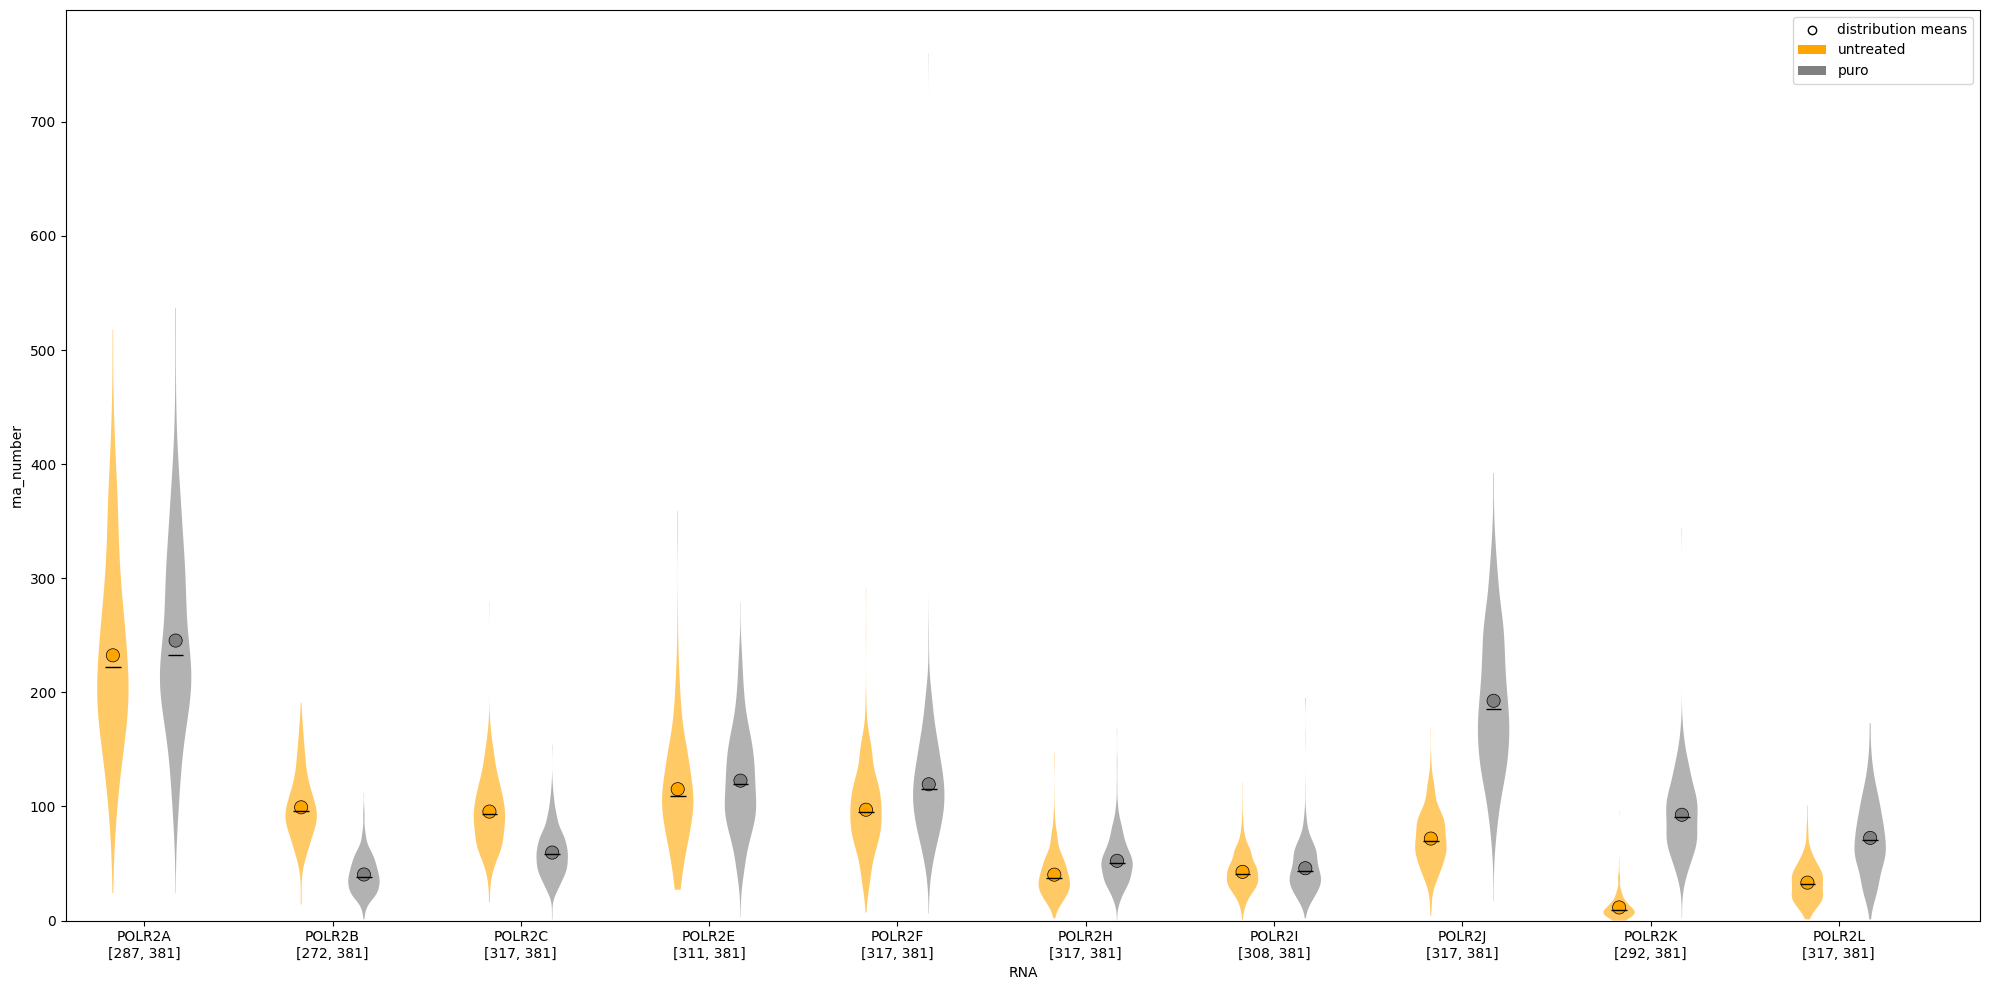

In [18]:
measure_test = 'rna_number'
def distribution_graph(
    Cell_data : pd.DataFrame,
    measure = measure_test,
) :
    
    grouped_data = Cell_data.groupby(['target', 'treatment'])[measure].apply(list)
    grouped_data = grouped_data.sort_index(level=[0,1], ascending=[True,False])

    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    ax = distribution_super_plot(
        grouped_data,
        ax=ax,
        title='',
        xlabel='RNA',
        ylabel=measure,
        colors = ['orange','gray'],
        sort_parameters = {'level' : [0,1], 'ascending' : [True, False]}
    )
    
    if 'index' in measure :
        min_x,max_x,min_y,max_y = plt.axis()
        ax.plot([min_x, max_x], [1,1], '--b')
    
    
    plt.tight_layout()
    
    return fig

fig = distribution_graph(Cell_data)
fig.show()

## Plot all

In [19]:
# measures = []
# or :
from Sequential_Fish.analysis.analysis_parameters import distribution_measures as measures

In [20]:
os.makedirs(f"{output_path}/{folder_name}/",exist_ok=True)

for measure in measures:
    fig = distribution_graph(
        Cell_data,
        measure=measure
    )
    
    fig.savefig(f"{output_path}/{folder_name}/{measure}.svg")
    plt.close()


/home/floric/miniconda3/envs/dev/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
